# Visualization of the Glass Dataset

In [42]:
from src.read.processing import Processing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# 1. Load Data

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dataclass = Processing(source_path='input/datasets/')
df_orig = dataclass.read('glass').copy()

dataclass.general_preprocessing()
df = dataclass.df.copy()

df.iloc[:3, :5]

,RI,Na,Mg,Al,Si
0,-0.143715,-0.758384,0.566677,-0.652289,0.490551
1,-0.638803,-1.531681,0.580575,-0.190536,0.309376
2,-0.143715,-0.242853,0.552779,-0.070079,-0.014151


# 2. Analyze your PCA algorithm

In this section we will explore the Glass dataset with the PCA algortihm. We will follow the format for data processing that was mentioned in the previous section.

## 2.1. Handmade PCA

In [44]:
from src.decomposition.PCA import PCA

X = df.iloc[:, :-1]
y = df.iloc[:, [-1]]

pca = PCA(n_components=X.shape[1])
X_transformed = pca.fit_transform(X)
df_pca = pd.DataFrame(X_transformed, columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_pca['Class'] = df_orig['Type']

In [45]:
df_pca.iloc[:3, :5]

,PC1,PC2,PC3,PC4,PC5
0,0.213979,1.065052,0.202840,-0.293377,-0.684514
1,-0.070901,1.301203,-0.215924,-0.635351,-0.695413
2,-0.155774,0.738150,0.028878,0.273049,-0.534419


In [46]:
df_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-3.722360e-17,-9.286445e-17,1.971424e-17,-2.101123e-17,1.712026e-17,1.110223e-16,-8.041335e-17,-2.574524e-17,1.741208e-17
std,1.588381e+00,1.435164e+00,1.188040e+00,1.078563e+00,9.582762e-01,7.280881e-01,6.088437e-01,2.532839e-01,4.020412e-02
min,-4.432540e+00,-6.193445e+00,-7.987193e+00,-3.777312e+00,-3.187904e+00,-2.883125e+00,-2.849883e+00,-1.299207e+00,-2.941691e-01
25%,-6.575585e-01,-6.345286e-01,-2.820617e-01,-5.235952e-01,-5.419091e-01,-2.976271e-01,-2.466095e-01,-1.198657e-01,-1.936768e-02
50%,-5.651885e-02,6.591921e-01,9.336385e-02,-3.727560e-02,-3.485682e-01,5.216874e-02,4.648477e-02,1.091476e-02,4.222728e-03
75%,6.342901e-01,1.021452e+00,4.473870e-01,4.704891e-01,5.596477e-01,3.767992e-01,3.192301e-01,1.023046e-01,2.544850e-02
max,7.138698e+00,1.816556e+00,5.165069e+00,3.999072e+00,3.643798e+00,4.306668e+00,1.459604e+00,1.070969e+00,7.084032e-02


We can see from the table several factors common to the PCA algorithm:
* The mean values lie close to 0, this suggests that on average, the data is centered around 0. This is because the PCA aims to transform the data to a new coordinate system with uncorrleated variables (principal components) and centered around 0.
* The first principal component (PC1) explains the most variance out of all the principal components (has the highest deviation). The consequent principal components explain less and less of the variance (have progressivley lower standard deviations).

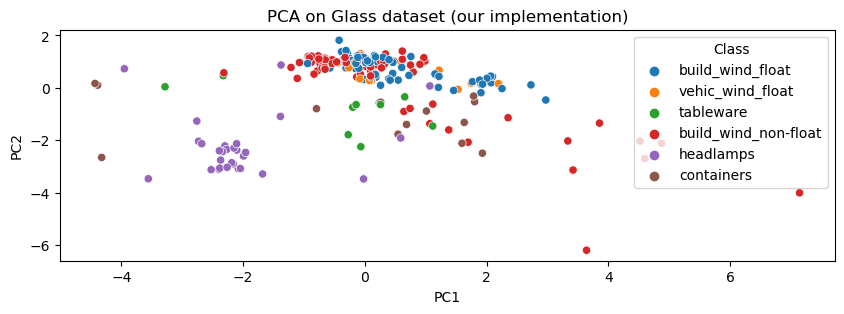

In [47]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_pca)
plt.title("PCA on Glass dataset (our implementation)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

We can see in the PCA that the information portrayed. Here we can see that the first component has the higher variance than the second component.

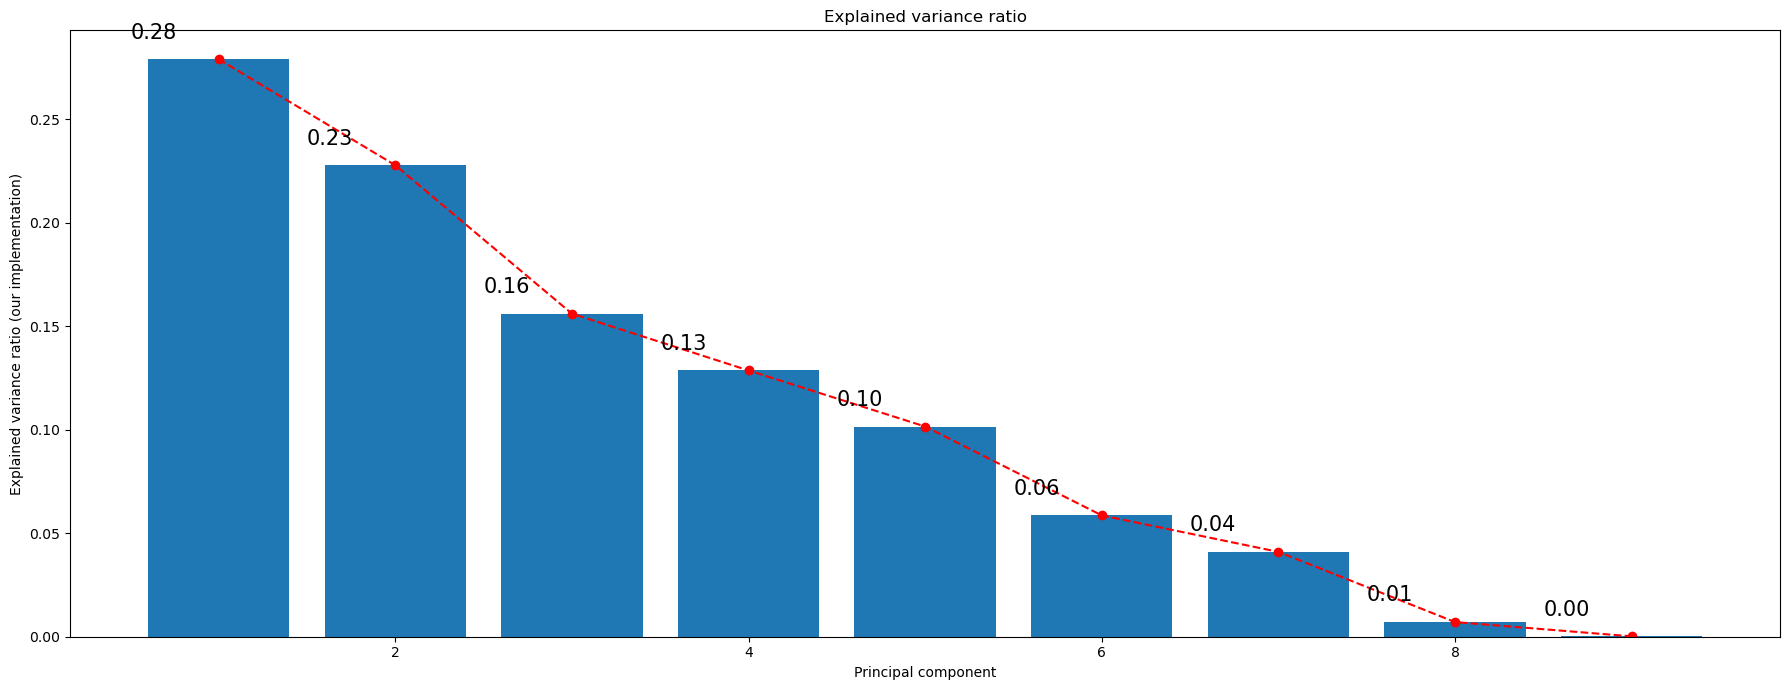

In [6]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), pca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio (our implementation)")
plt.tight_layout()
plt.show()

In graph above we can see that the the variance is slowly reduced until it reaches 0, where the ninth principal component does not explain any of the variance in the graph. The eight component corresponds to around 4% of the variance that is explained in the first component. In the following sections, we will see the contrast between variance in a categorical dataset (such as vote) and an ordinal dataset (glass). We will see that in contrast to the glass dataset the vote dataset has a very big dip in variance explained per principal component due to the data type.

## 2.2. Sklearn PCA

In this section, we will explore the results obtained with the implmenetation of SKLearn's PCA and compare the results to our implementation.

In [7]:
# Same with sklearn PCA
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=X.shape[1])
X_sk_transformed = sklearn_pca.fit_transform(X)
df_skpca = pd.DataFrame(X_sk_transformed, 
                        columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_skpca['Class'] = df_orig['Type']

df_skpca.iloc[:3, :5]

,PC1,PC2,PC3,PC4,PC5
0,0.213979,-1.065052,-0.202840,-0.293377,-0.684514
1,-0.070901,-1.301203,0.215924,-0.635351,-0.695413
2,-0.155774,-0.738150,-0.028878,0.273049,-0.534419


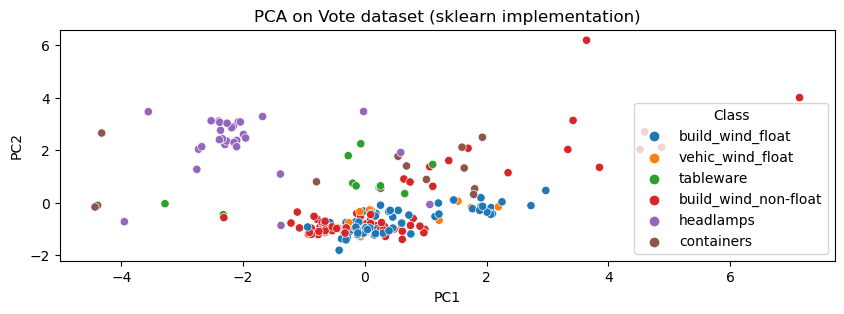

In [8]:
# Plot
plt.figure(figsize=(10, 3))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_skpca)
plt.title("PCA on Glass dataset (sklearn implementation)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

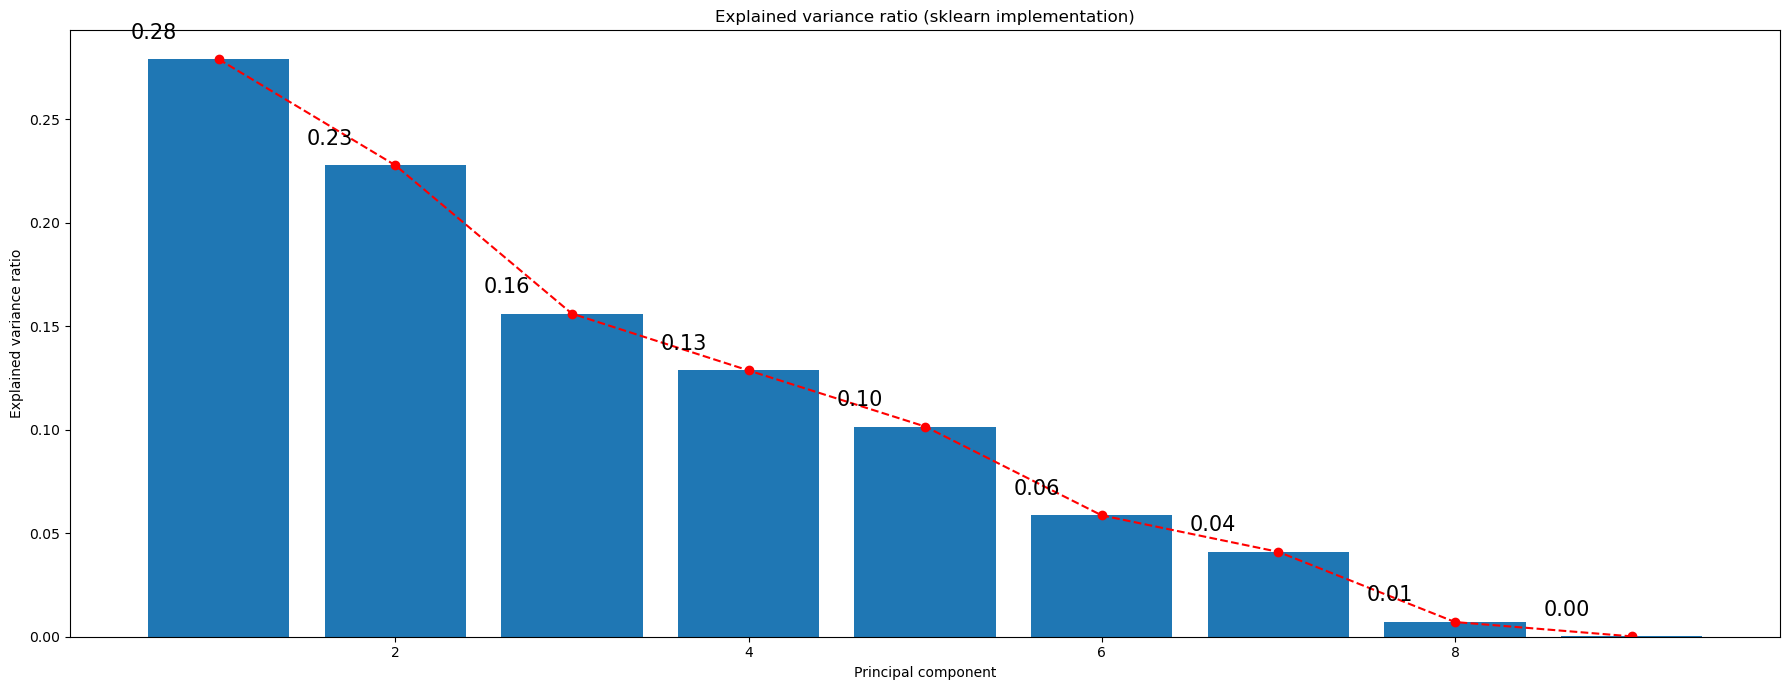

In [9]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (sklearn implementation)")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

We can see that we get a slightly different PCA using the Sklearn's version of PCA. This is because the treatment of the sign is different. The Sklearn algorithm avoids switching the components around by selecting the largest value to be the first eignvector. We can see that our PCA mantains the same first eignvector, therefore the signs of the coming coming vectors can be interchanged if the order is mantained. 

We can seet the variance explained by each component is the same for our implementation of the PCA and the Sklearn version of the PCA.

# 3. Compare with IncrementalPCA

The PCA object proves to be beneficial but exhibits limitations when dealing with large datasets. Its primary drawback is its exclusive support for batch processing, necessitating that all data fit into main memory. In contrast, the IncrementalPCA object offers an alternative processing approach, enabling partial computations that closely align with PCA results while handling data in a minibatch manner. This facilitates the implementation of out-of-core Principal Component Analysis through two methods:

1. Utilizing the `partial_fit` method on sequentially fetched data chunks from the local hard drive or a network database.
2. Invoking the `fit` method on a sparse matrix or a memory-mapped file using `numpy.memmap`.

Notably, IncrementalPCA stores estimates of component and noise variances, updating `explained_variance_ratio_` incrementally. Consequently, memory usage is contingent on the number of samples per batch rather than the overall dataset size.

In [48]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=X.shape[1])
X_ipca_transformed = ipca.fit_transform(X)
df_ipca = pd.DataFrame(X_ipca_transformed, 
                        columns=[f'PC{i}' for i in range(1, X.shape[1] + 1)])
df_ipca['Class'] = df_orig['Type']

df_ipca.iloc[:3, :5]

,PC1,PC2,PC3,PC4,PC5
0,0.213979,1.065052,-0.202840,0.293377,-0.684514
1,-0.070901,1.301203,0.215924,0.635351,-0.695413
2,-0.155774,0.738150,-0.028878,-0.273049,-0.534419


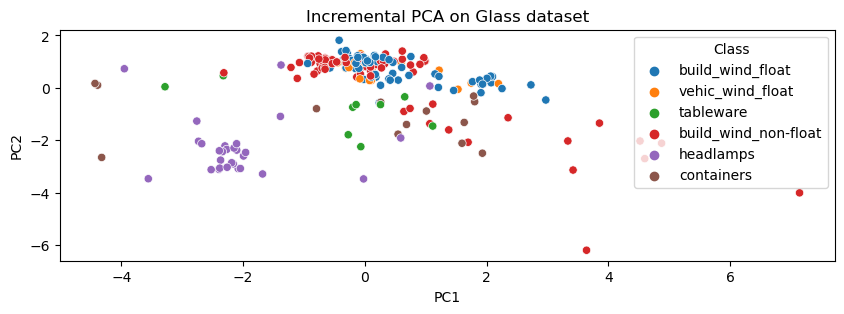

In [49]:
# Plot
plt.figure(figsize=(10, 3))
sns.scatterplot(x='PC1', y='PC2', hue='Class', data=df_ipca)
plt.title("Incremental PCA on Glass dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

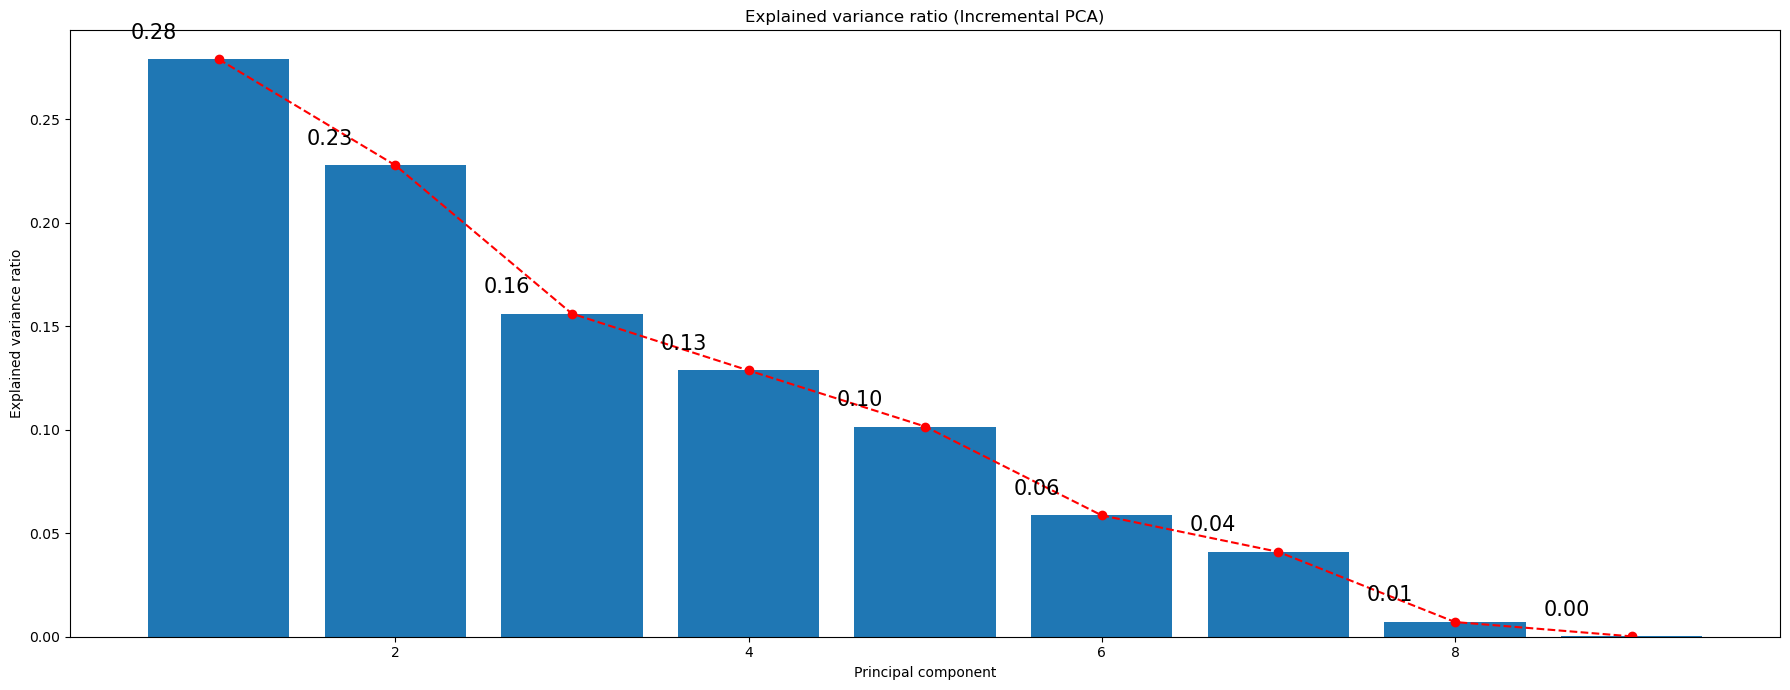

In [50]:
# Plot explained variance
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1] + 1), ipca.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1] + 1), ipca.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), sklearn_pca.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (Incremental PCA)")
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

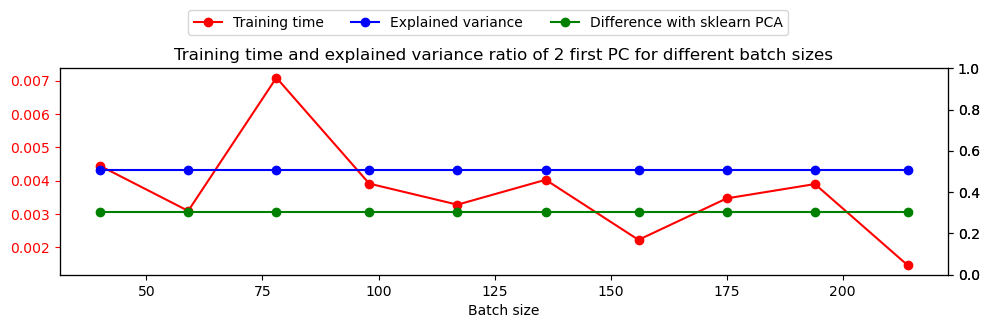

In [51]:
# Compare training time for different values of batch size
from time import time

batch_sizes = np.linspace(40, X.shape[0], 10, dtype=int)
times = []
explained = []
diffs = []
for batch_size in batch_sizes:
    ipca = IncrementalPCA(n_components=X.shape[1], batch_size=batch_size)
    start = time()
    ipca.fit(X)
    end = time()
    times.append(end - start)

    pct_explained_variance = ipca.explained_variance_ratio_[:2].sum()
    explained.append(pct_explained_variance)

    avg_dif = np.abs(ipca.components_ - sklearn_pca.components_).mean()
    diffs.append(avg_dif)

# Create double y axis plot
fig, ax1 = plt.subplots(figsize=(10, 3))
ax1.plot(batch_sizes, times, linestyle='-', marker='o', color='r', label='Training time')
ax1.set_xlabel('Batch size')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.plot(batch_sizes, explained, linestyle='-', marker='o', color='b', label='Explained variance')
ax2.set_ylim([0, 1])

ax3 = ax1.twinx()
ax3.plot(batch_sizes, diffs, linestyle='-', marker='o', color='g', label='Difference with sklearn PCA')
ax3.set_ylim([0, 1])

fig.legend(bbox_to_anchor=(0.8, 1.1), ncol=3)
plt.title("Training time and explained variance ratio of 2 first PC for different batch sizes")
fig.tight_layout()

For a `batch_size` equal to the number of samples, the results are the same as the PCA. This is because the algorithm is the same. The only difference is that the algorithm is implemented in a different way. The visible difference in the plots can be due to external factors such as the random initialization of the algorithm.

Our implementation of PCA is faster than the incremental one until `batch_size` of 260. However, when `batch_size` is increased, the IPCA is faster as it is expected given that sklearn PCA is faster than ours.

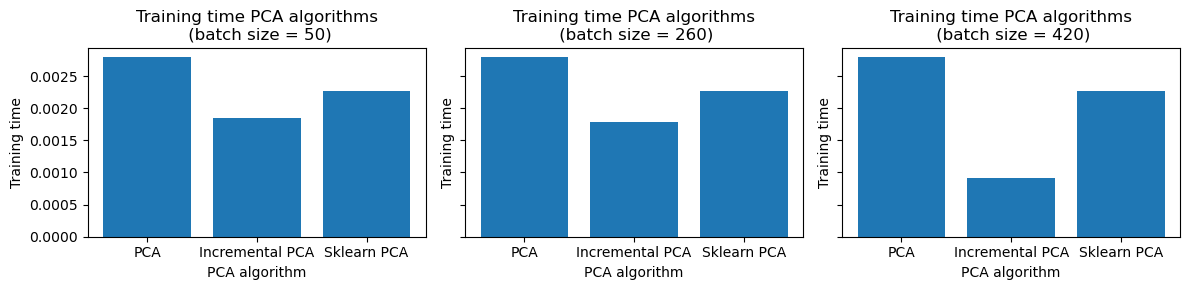

In [52]:
# Plot comparison of training time for PCA, Handmade PCA and Incremental PCA
from time import time

pca = PCA(n_components=X.shape[1])
start = time()
pca.fit(X)
end = time()
pca_time = end - start

sklearn_pca = sklearnPCA(n_components=X.shape[1], random_state=0)
start = time()
sklearn_pca.fit(X)
end = time()
sklearn_pca_time = end - start

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
ls_batch_sizes = [50, 260, 420]

for i, bs in enumerate(ls_batch_sizes):
    ipca = IncrementalPCA(n_components=X.shape[1], batch_size=bs)
    start = time()
    ipca.fit(X)
    end = time()
    ipca_time = end - start

    ax[i].bar(['PCA', 'Incremental PCA', 'Sklearn PCA'], [pca_time, ipca_time, sklearn_pca_time])
    ax[i].set_title("Training time PCA algorithms\n (batch size = {})".format(bs))
    ax[i].set_xlabel("PCA algorithm")
    ax[i].set_ylabel("Training time")
fig.tight_layout()
plt.show()

From these figures we can conclude that there isn't a significant change in the current variance explained of each component. However, we know that the IncrementalPCA is designed to be a more efficient form of PCA: loosing some accuracy to in change have better memory and temporal usage. This is specifically useful for larger datasets, we can see that the training time in the incremental PCA starts to be noticable very early and around the 420 batch we can see a large difference between our PCA, the incremental PCA and the Sklearn PCA. Indicating, that the larger we make the batch size the greater difference we will see between the computational times in the different versions of the PCA.

# 4. Use PCA with k-Means and BIRCH to compare performances

As mentioned above, after projecting the data into the 2 first Principal Components, the classes are quite well separated. A lot of variables weren't providing almost any information in terms of variance. This causes the well known dimensionality curse, in which when the number of features is increased, the performance of the algorithm decreases. This is why PCA is used, to reduce the number of features and hence, the dimensionality of the data.

In [53]:
from sklearn.cluster import Birch
from src.clustering.KMeans import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, v_measure_score, confusion_matrix, classification_report

In [54]:
X = df.iloc[:, :-1]
y = df['Type']

n_clusters = len(np.unique(y))

birch = model_dbs = Pipeline([
    ('scaler', StandardScaler()),
    ('model', Birch())
])

kmeans = model_dbs = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(k=n_clusters, max_iterations=100, random_state=0))])

In [55]:
def evaluate_model(model, X, y):
    model.fit(X)
    y_pred = model['model'].labels_
    return silhouette_score(X, y_pred), v_measure_score(y, y_pred)

# Cluster the transformed Data using BIRCH

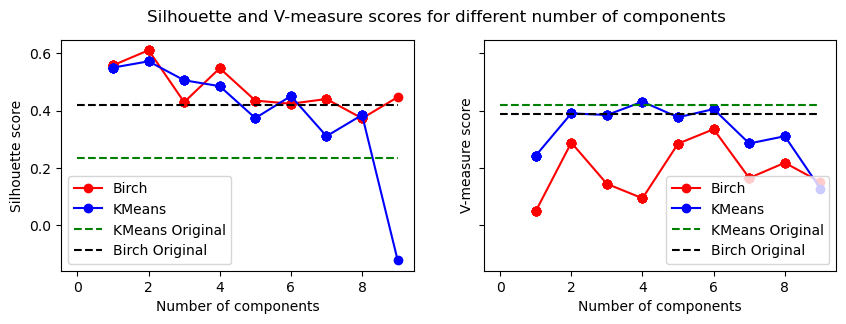

In [56]:
m = X.shape[1]
n_components = np.linspace(1, m, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_pca.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before PCA
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before PCA
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components")

plt.show()



In [57]:
print("Evaluation results on BIRCH using the original dataset")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(birch, X, y)))

print("-"*50)

print("Evaluation results on KMeans using the original dataset")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(kmeans, X, y)))

print("-"*50)

print("Evaluation results on Birch using the PC1")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(birch, df_pca.iloc[:, :1], y)))

print("-"*50)

print("Evaluation results on KMeans using the PC1")
print("Silhouette {:.2f} - V-Measure {:.2f}".format(*evaluate_model(kmeans, df_pca.iloc[:, :1], y)))


Evaluation results on BIRCH using the original dataset
Silhouette 0.42 - V-Measure 0.39
--------------------------------------------------
Evaluation results on KMeans using the original dataset
Silhouette 0.23 - V-Measure 0.16
--------------------------------------------------
Evaluation results on Birch using the PC1
Silhouette 0.56 - V-Measure 0.05
--------------------------------------------------
Evaluation results on KMeans using the PC1
Silhouette 0.55 - V-Measure 0.24


As can be infered from the previous plot, in every case, incrementing the number of components even adding more information, leads to equal or worse results. This is because of the dimensionality curse. The more features, the worse the performance of the algorithm.

In the case of silhouette score, a model trained only with the first component has far better silhouette score than in the case of the model trained without applying PCA. On the other hand, in terms of V-Measure, both Birch and K-Means' performance slightly increase with 2 and 6 components, but decrease in other cases. KMeans obtains a maximum with 4 components whereas Birch obtains the maximum V-Measure score with 4 components.

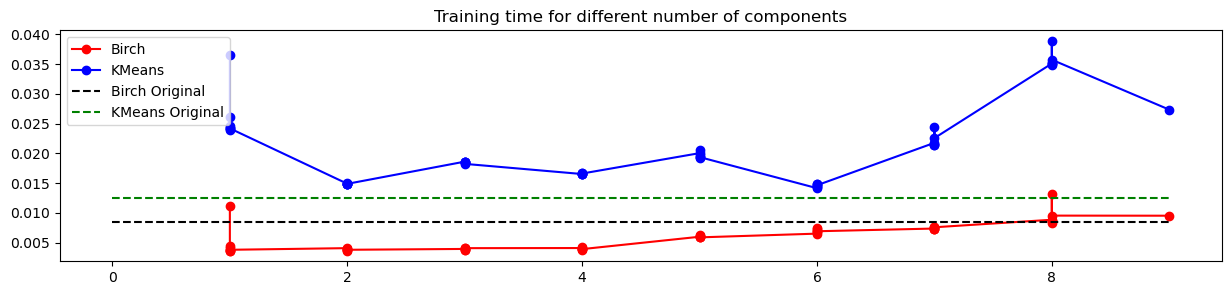

In [58]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_pca.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 3), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

We can see a slight imporvement in the temporal capacity of the algorithms as well. Again we see that due to the size of the chosen dataset the temporal difference is not as significant as it would be with a larger dataset. Either way, we see that Birch shows promisnig results both in the training scores and the efficiency of the dataset.

# 5. Cluster the transformed Data (SVD) using K-Means and Birch

Use sklearn.decomposition.truncatedSVD to reduce the dimensionality of your data sets
and cluster it with your own k-Means, the one that you implemented in Work 1, and with the
BIRCH from sklearn library. Compare your new results with the ones obtained previously. 

## Non Centered Data

In [59]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=X.shape[1] - 1)

X_transformed_svd = svd.fit_transform(X)
df_svd = pd.DataFrame(X_transformed_svd, 
                        columns=[f'SV{i}' for i in range(1, X.shape[1])])
df_svd['Class'] = df_orig['Type']

df_svd.iloc[:3, :5]

,SV1,SV2,SV3,SV4,SV5
0,0.213979,-1.065052,-0.202840,-0.293377,-0.684514
1,-0.070901,-1.301203,0.215924,-0.635351,-0.695413
2,-0.155774,-0.738150,-0.028878,0.273049,-0.534419


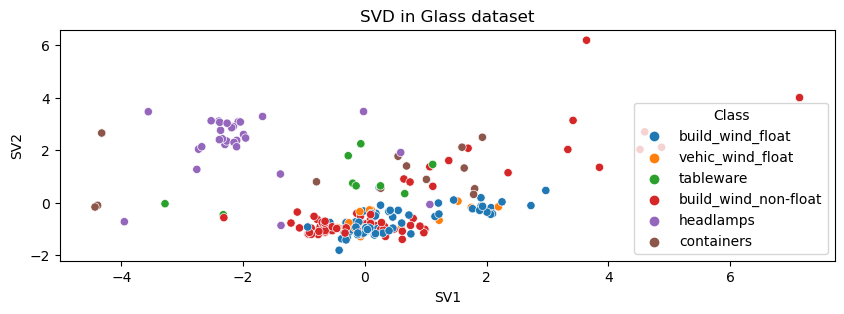

In [60]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.scatterplot(x='SV1', y='SV2', hue='Class', data=df_svd)
plt.title("SVD in Glass dataset")
plt.xlabel("SV1")
plt.ylabel("SV2")
plt.show()

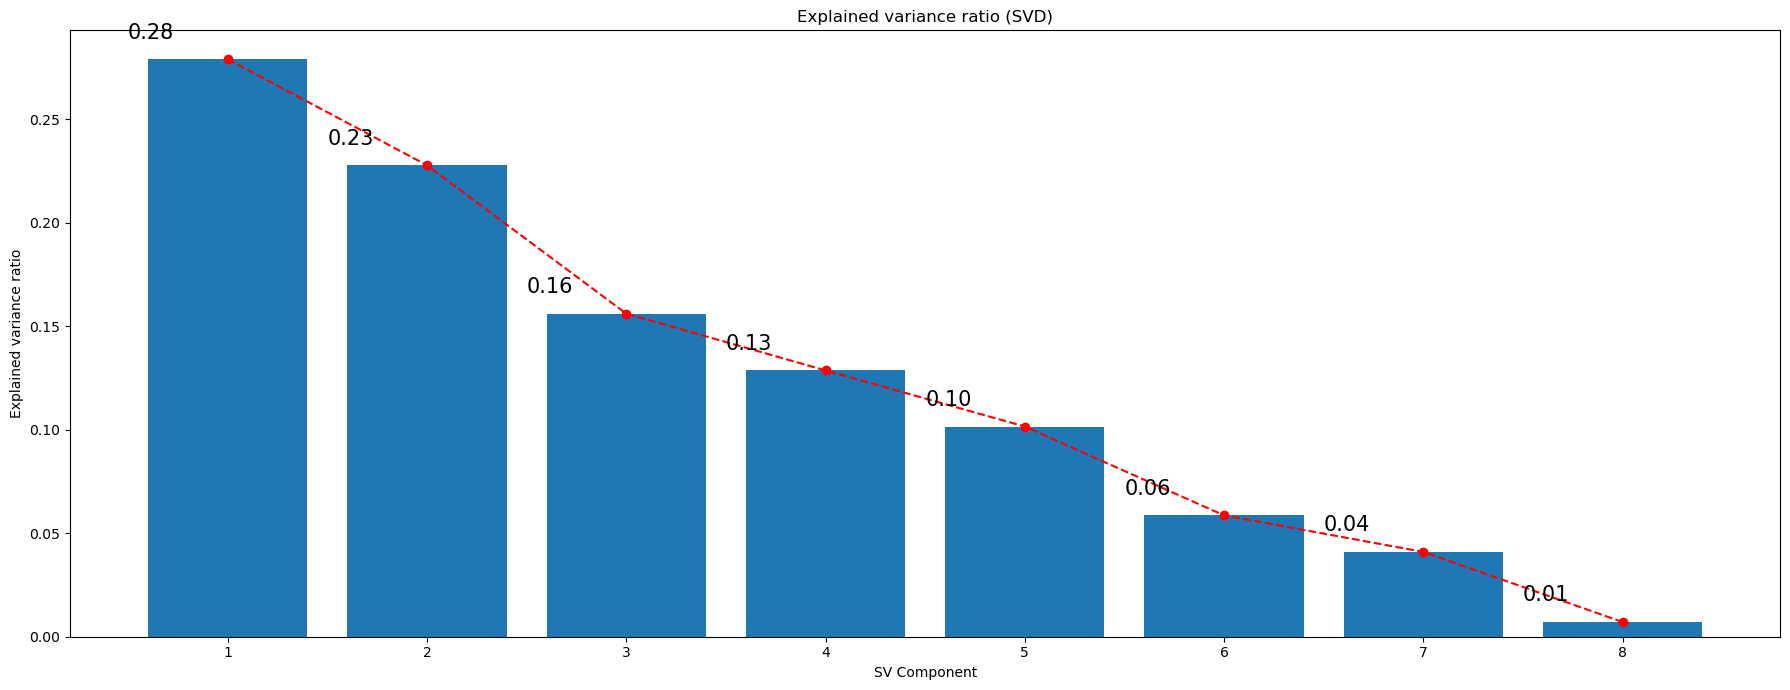

In [61]:
# Plot explained variance
svd_in = svd
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1]), svd_in.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1]), svd_in.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), svd_in.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (SVD)")
plt.xlabel("SV Component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

In [62]:
import pandas as pd

def df_to_markdown(dataframe, file_path):
    """
    Convert a Pandas DataFrame to a 
    own table and export it to a file.

    Parameters:
    - dataframe (pd.DataFrame): The Pandas DataFrame to convert.
    - file_path (str): The file path for exporting the Markdown table.
    """
    # Convert DataFrame to Markdown
    markdown_table = dataframe.to_markdown(index=False)

    # Export Markdown table to a file
    with open(file_path, 'w') as file:
        file.write(markdown_table)

# Example Usage:
# Assuming you have a DataFrame called 'my_dataframe'
# and you want to export it to a file named 'output_table.md'
# df_to_markdown(my_dataframe, 'output_table.md')

df_to_markdown(df_pca.describe(), 'output_table.md')

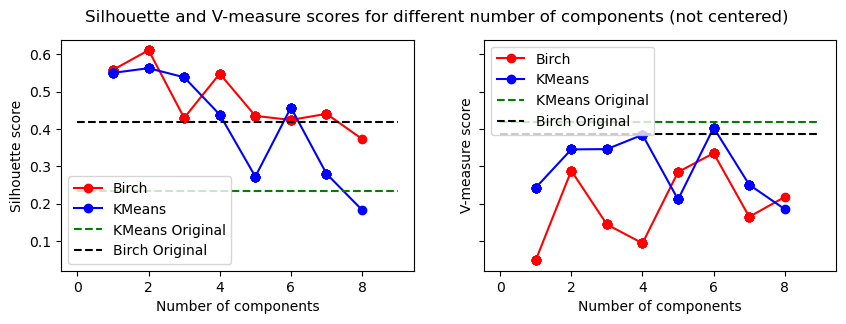

In [63]:
m = X.shape[1]
n_components = np.linspace(1, m - 1, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_svd.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components (not centered)")

plt.show()

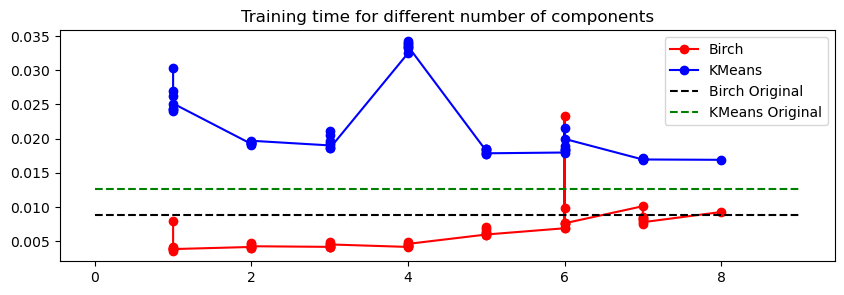

In [64]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m - 1, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_svd.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

We can see that the SVG and the PCA produce the same results in terms of the output eignvectors. We can see that they also follow somewhat of the same temporal pattern as well, in order to see a more clear correlation we would have to run this with a larger dataset.

## Centered Version

In [65]:
from sklearn.decomposition import TruncatedSVD
svd = Pipeline([
                ('scaler', StandardScaler()),
                ('svd', TruncatedSVD(n_components=X.shape[1] - 1))])

X_transformed_svd = svd.fit_transform(X)
df_svd = pd.DataFrame(X_transformed_svd, 
                        columns=[f'SV{i}' for i in range(1, X.shape[1])])
df_svd['Class'] = df_orig['Type']

df_svd.iloc[:3, :5]

,SV1,SV2,SV3,SV4,SV5
0,0.213979,-1.065052,-0.202840,-0.293377,-0.684514
1,-0.070901,-1.301203,0.215924,-0.635351,-0.695413
2,-0.155774,-0.738150,-0.028878,0.273049,-0.534419


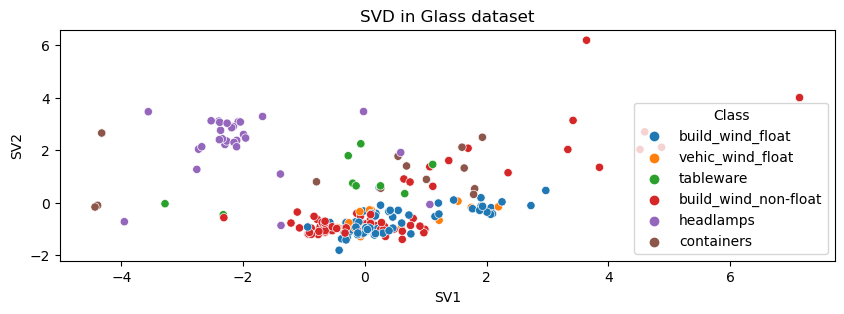

In [66]:
# Plot
import seaborn as sns
plt.figure(figsize=(10, 3))
sns.scatterplot(x='SV1', y='SV2', hue='Class', data=df_svd)
plt.title("SVD in Glass dataset")
plt.xlabel("SV1")
plt.ylabel("SV2")
plt.show()

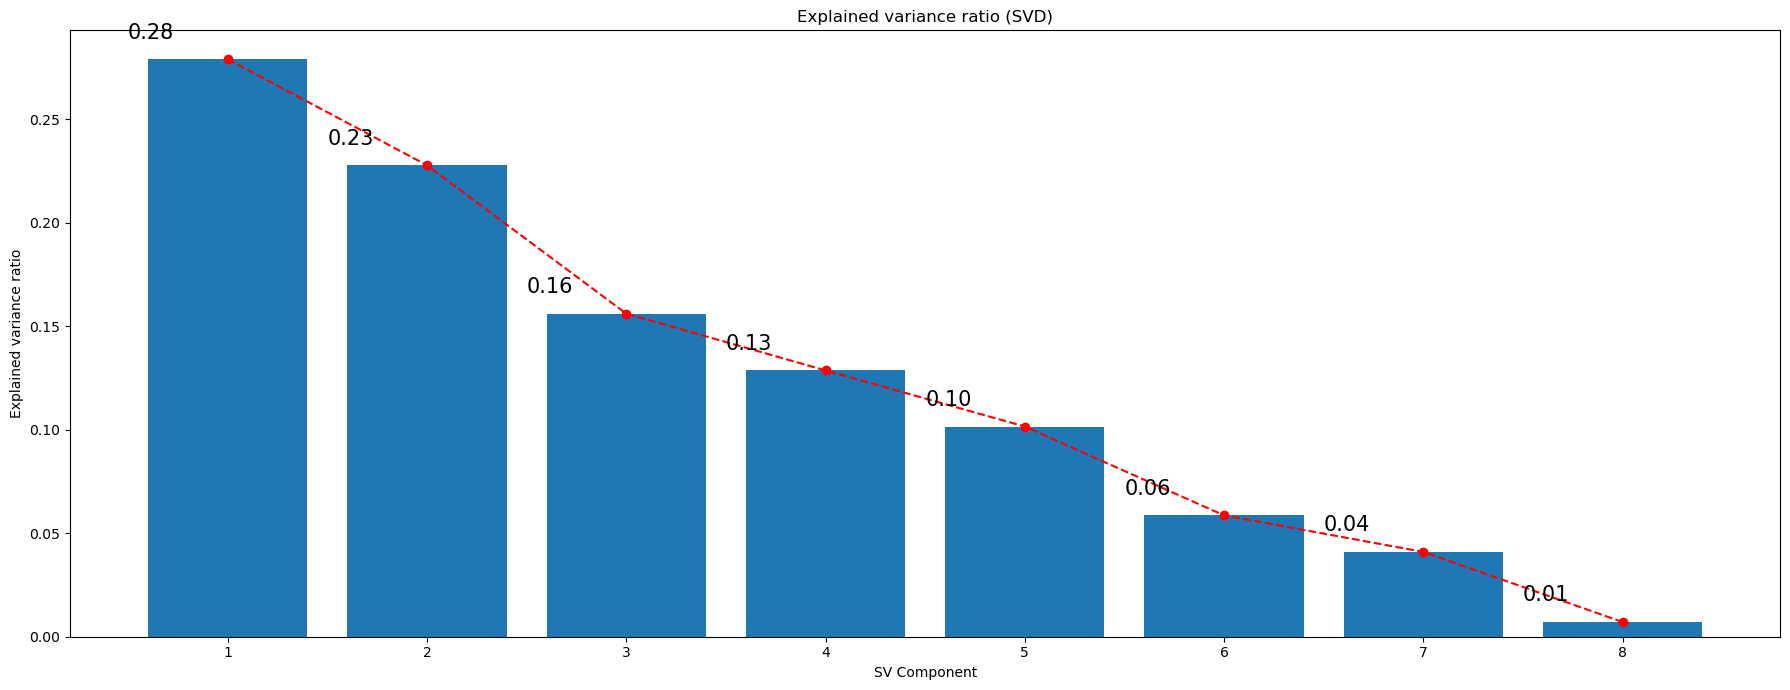

In [67]:
# Plot explained variance
svd_in = svd['svd']
plt.figure(figsize=(18, 7))
plt.plot(range(1, X.shape[1]), svd_in.explained_variance_ratio_, linestyle='--', marker='o', color='r')
plt.bar(range(1, X.shape[1]), svd_in.explained_variance_ratio_)
for i, j in zip(range(1, X.shape[1] + 1), svd_in.explained_variance_ratio_):
    plt.text(i - 0.5, j + 0.01, f'{j:.2f}', fontsize=15)
plt.title("Explained variance ratio (SVD)")
plt.xlabel("SV Component")
plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

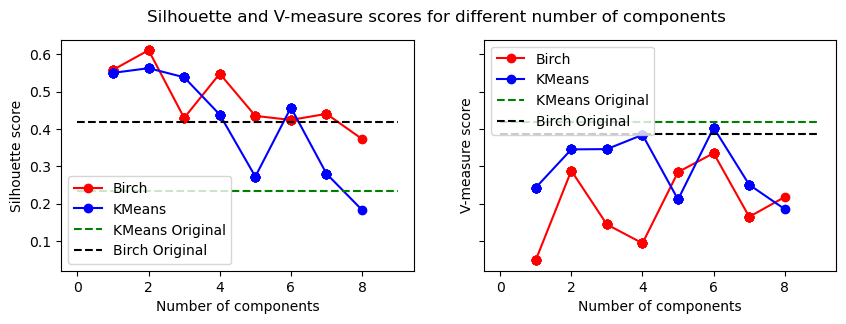

In [68]:
m = X.shape[1]
n_components = np.linspace(1, m - 1, dtype=int)
birch_silhouette_scores, km_silhoette_scores = [], []
birch_v_measure_scores, km_v_measure_scores = [], []

for n in n_components:

    X_transformed = df_svd.iloc[:, :n]
    birch_silhouette_score, birch_v_measure_score = evaluate_model(birch, X_transformed, y)
    km_silhoette_score, km_v_measure_score = evaluate_model(kmeans, X_transformed, y)

    birch_silhouette_scores.append(birch_silhouette_score)
    birch_v_measure_scores.append(birch_v_measure_score)

    km_silhoette_scores.append(km_silhoette_score)
    km_v_measure_scores.append(km_v_measure_score)

km_silhoette_score_nored, km_v_measure_score_nored = evaluate_model(kmeans, X, y)
birch_silhoette_score_nored, birch_v_measure_score_nored = evaluate_model(birch, X, y)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax[0].plot(n_components, birch_silhouette_scores, linestyle='-', 
           marker='o', color='r', label='Birch')
ax[0].plot(n_components, km_silhoette_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[0].hlines(y=km_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[0].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[0].set_xlabel('Number of components')
ax[0].set_ylabel('Silhouette score')

ax[1].plot(n_components, birch_v_measure_scores, linestyle='-', 
           marker='o', color='r', label='Birch')

ax[1].plot(n_components, km_v_measure_scores, linestyle='-',
              marker='o', color='b', label='KMeans')

# plot horizontal line for original values before SVD
ax[1].hlines(y=birch_silhoette_score_nored, xmin=0, xmax=m, color='g', 
             linestyle='--', label='KMeans Original')

ax[1].hlines(y=birch_v_measure_score_nored, xmin=0, xmax=m, color='k', 
             linestyle='--', label='Birch Original')

ax[1].set_ylabel('V-measure score')
ax[1].set_xlabel('Number of components')

ax[0].legend()
ax[1].legend()

fig.suptitle("Silhouette and V-measure scores for different number of components")

plt.show()



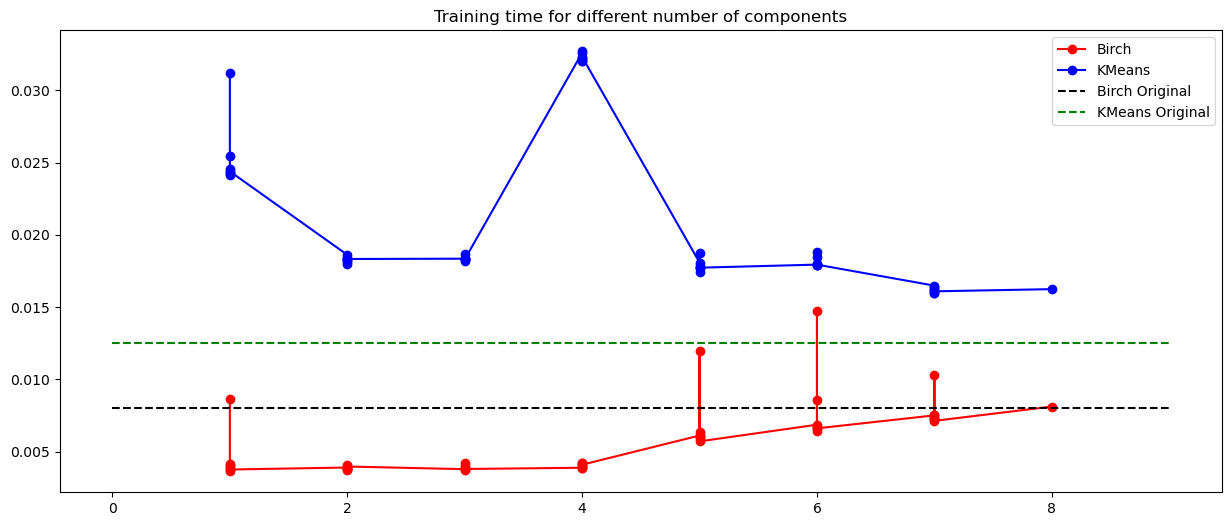

In [69]:
# PLot training time for different number of components

from time import time

n_components = np.linspace(1, m - 1, dtype=int)
birch_times, km_times = [], []

for n in n_components:
    
    X_transformed = df_svd.iloc[:, :n]

    start = time()
    birch.fit(X_transformed)
    end = time()
    birch_times.append(end - start)

    start = time()
    kmeans.fit(X_transformed)
    end = time()
    km_times.append(end - start)

# Time on non-reduced dataset
start = time()
birch.fit(X)
end = time()
birch_time_nonred = end - start

start = time()
kmeans.fit(X)
end = time()
km_time_nonred = end - start

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6), sharey=True)
ax.plot(n_components, birch_times, linestyle='-', 
           marker='o', color='r', label='Birch')
ax.plot(n_components, km_times, linestyle='-',
              marker='o', color='b', label='KMeans')

ax.hlines(y=birch_time_nonred, xmin=0, xmax=m, color='k',
            linestyle='--', label='Birch Original')

ax.hlines(y=km_time_nonred, xmin=0, xmax=m, color='g',
            linestyle='--', label='KMeans Original')

plt.title("Training time for different number of components")
ax.legend()

The results are exactly the same than for the case of PCA. 

In [70]:
print("Evaluation results on BIRCH using the transformed dataset")
evaluate_model(birch, X_transformed_svd[:, :1], y)

Evaluation results on BIRCH using the transformed dataset


(0.5581143662338703, 0.048175048448806206)

In [71]:
print("Evaluation results on KMeans using the transformed dataset")
evaluate_model(kmeans, X_transformed_svd[:, :1], y)

Evaluation results on KMeans using the transformed dataset


(0.5500852369705154, 0.2425249457987621)

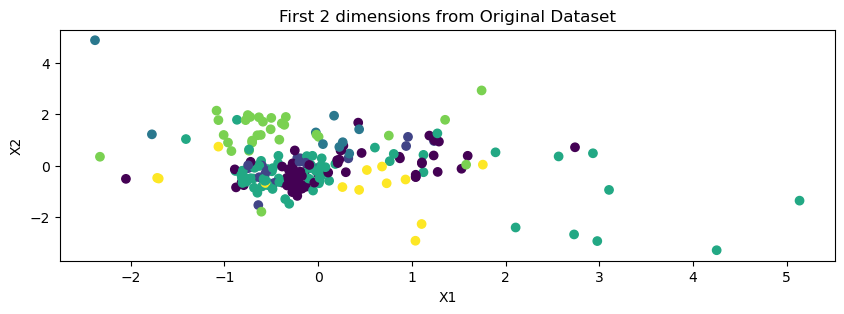

In [72]:
# Visualize the original Dataset
plt.figure(figsize=(10, 3))
plt.scatter(df.to_numpy()[:, 0], df.to_numpy()[:, 1], c=df['Type'])
plt.title("First 2 dimensions from Original Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# 6. Visualize in low-dimensional space

Visualize in low-dimensional space. You need to visualize your original data sets, the result of
the k-Means and BIRCH algorithms without the dimensionality reduction, and the result of the
k-Means and BIRCH algorithms with the dimensionality reduction. To visualize in a lowdimensional space (2D or 3D) you will use: PCA and ISOMAP. You will find useful information
of how to deal with this algorithm at:

Given that the data is categorical, the visualization of its 2 first components is not very useful. Until now, 2 first linear projections have been used in order to visualize the data, such as SVD and PCA. The result is that they both provide similar information.

In this case, Self Organized Maps are used in order to have a nonlinear point of view, i.e. to use a different approach.

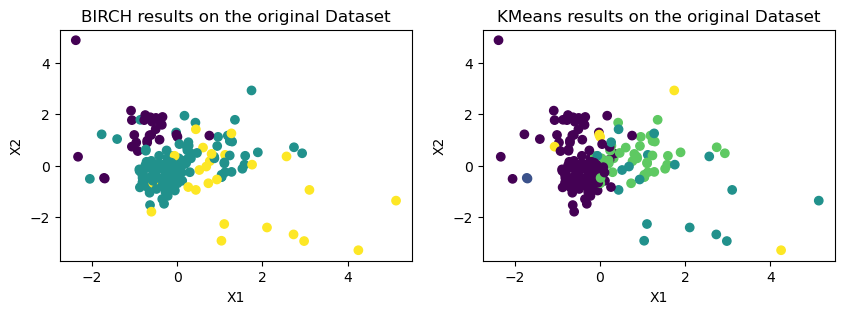

In [73]:
birch.fit(X)
kmeans.fit(X)

# Visualize the results of BIRCH and KMenas on the original Dataset
figure, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=birch['model'].labels_)
axs[0].set_title("BIRCH results on the original Dataset")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")

axs[1].scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=kmeans['model'].labels_)
axs[1].set_title("KMeans results on the original Dataset")
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2")
plt.show()

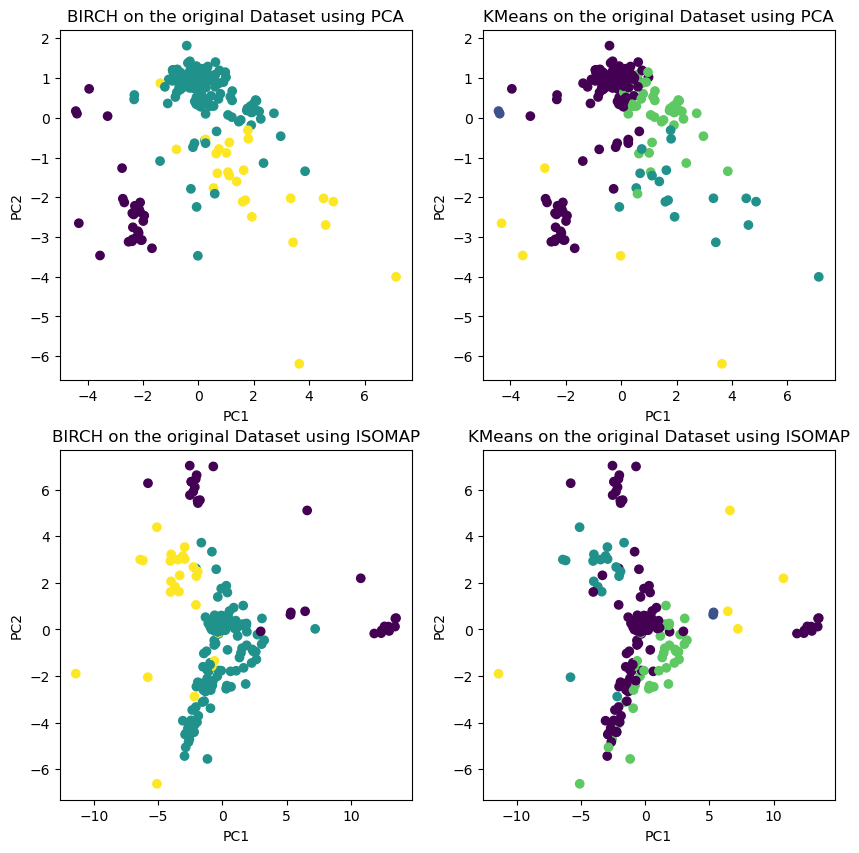

In [74]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)

X_transformed = pca.fit_transform(X)
X_transformed_isomap = isomap.fit_transform(X)

# Visualize results of BIRCH and KMeans on the original Dataset using PCA and ISOMAP
figure, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(X_transformed[:, 0], X_transformed[:, 1], c=birch['model'].labels_)
axs[0, 0].set_title("BIRCH on the original Dataset using PCA")
axs[0, 0].set_xlabel("PC1")
axs[0, 0].set_ylabel("PC2")

axs[0, 1].scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeans['model'].labels_)
axs[0, 1].set_title("KMeans on the original Dataset using PCA")
axs[0, 1].set_xlabel("PC1")
axs[0, 1].set_ylabel("PC2")

axs[1, 0].scatter(X_transformed_isomap[:, 0], X_transformed_isomap[:, 1], c=birch['model'].labels_)
axs[1, 0].set_title("BIRCH on the original Dataset using ISOMAP")
axs[1, 0].set_xlabel("PC1")
axs[1, 0].set_ylabel("PC2")

axs[1, 1].scatter(X_transformed_isomap[:, 0], X_transformed_isomap[:, 1], c=kmeans['model'].labels_)
axs[1, 1].set_title("KMeans on the original Dataset using ISOMAP")
axs[1, 1].set_xlabel("PC1")
axs[1, 1].set_ylabel("PC2")
fig.tight_layout()
plt.show()



I understand. The Glass dataset is a dataset of 214 glass samples, each of which is characterized by nine attributes, including refractive index, Na, Mg, Al, Si, K, Ca, Ba, and Fe. The dataset is used to classify the glass samples into three types: building window glass, float glass, and vehicle window glass.

Isomap clustering is a dimensionality reduction and clustering algorithm that can be used to visualize and cluster high-dimensional data. It works by constructing a graph of the data points, where the edges of the graph represent the distances between the data points. The algorithm then finds a lower-dimensional embedding of the data points, while preserving the distances between the data points as much as possible.

To use isomap clustering to classify the Glass dataset, we would first need to construct a graph of the data points, where the edges of the graph represent the distances between the data points. We can then use the isomap algorithm to find a lower-dimensional embedding of the data points. Once we have the lower-dimensional embedding, we can use a clustering algorithm, such as KMeans, to cluster the data points into three types: building window glass, float glass, and vehicle window glass.

The scatter plot in the image shows the lower-dimensional embedding of the Glass dataset using isomap. The data has been clustered using two different algorithms, BIRCH and KMeans. The results show that both algorithms are able to cluster the data into three distinct groups.

Isomap clustering is a powerful algorithm that can be used to visualize and cluster high-dimensional data. It is a particularly good choice for clustering data that has a non-linear structure. The Glass dataset is a good example of a dataset that has a non-linear structure, and the results show that isomap clustering is able to effectively cluster the data into three distinct groups.